In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [8]:
df = df.drop(columns = 'Id')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [36]:
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

Model training


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [39]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 10)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

Predictions

In [40]:
pred = rf_classifier.predict(X_test)

In [41]:
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.5606796116504854


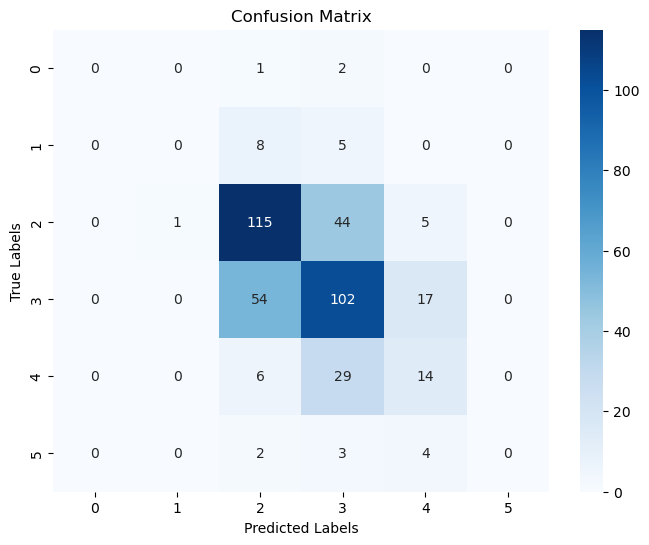

In [61]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Use of PCA

In [43]:
correlation = df.corr()['quality']
print(correlation)

fixed acidity           0.073852
volatile acidity       -0.219287
citric acid             0.141797
residual sugar          0.048156
chlorides              -0.046624
free sulfur dioxide    -0.060217
total sulfur dioxide   -0.225670
density                -0.153198
pH                      0.016378
sulphates               0.366939
alcohol                 0.482833
quality                 1.000000
Name: quality, dtype: float64


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

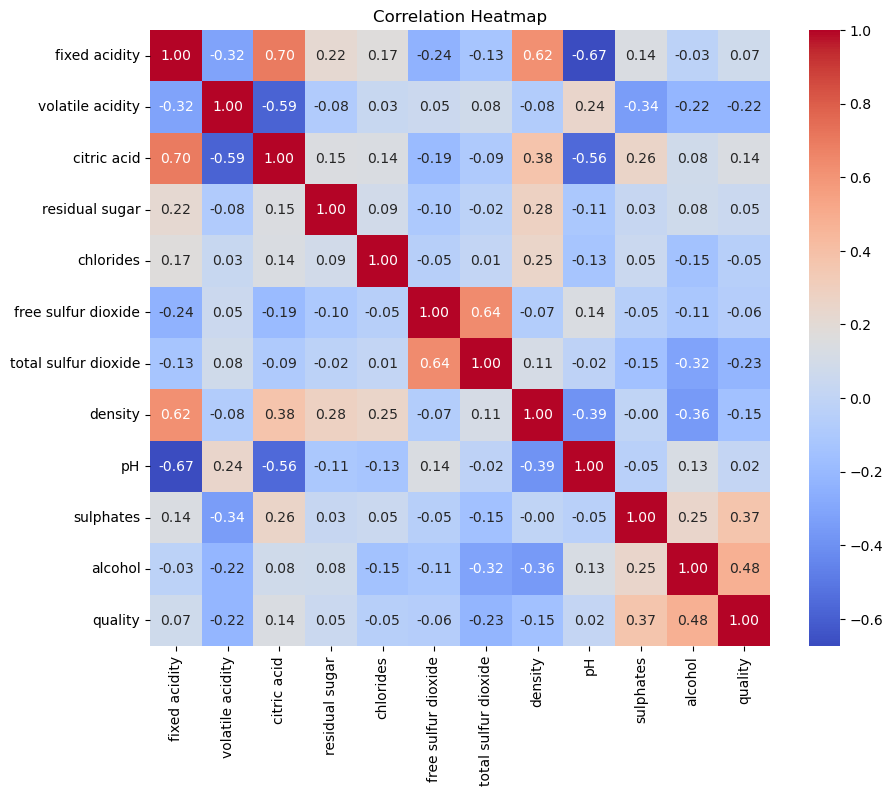

In [46]:
corr1 = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=5)
df_new = pca_df.fit_transform(X)

In [56]:
df_new.shape

(2056, 5)

In [57]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_new, Y, test_size = 0.2, random_state = 42)

In [58]:
rf_classifier_pca = RandomForestClassifier(n_estimators = 100, random_state = 10)
rf_classifier_pca.fit(X_train1, Y_train1)

RandomForestClassifier(random_state=10)

In [59]:
pred_pca = rf_classifier_pca.predict(X_test1)

In [60]:
accuracy1 = accuracy_score(Y_test1, pred_pca)
print("Accuracy:", accuracy1)

Accuracy: 0.5145631067961165
